## Hearing_Test Classification Based On Age And Physical_Score


### This dataset was gotten from Kaggle.com, there is no stated author but documentatio shows that it was originally a Google search synthetic dataset used to perform logistic regression problem to identify if a person has hearing loss or not based on thier age and physical_score. this dataset consist of two independent variables and one dependent variable. 

In [293]:
import pandas as pd

In [295]:
data = pd.read_csv(r"hearing_test.csv") # this was used to read the file into jupyter notebook

In [297]:
data.head() # here is a sneak pip into waht the dataset looks like by loading the first five data on the dataset

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


## Data Cleaning And Preprocessing

### Upon physically examination of the dataset, i could see that just as stated in kaggle.com, it's an already cleaned and preprocessed data  but to fulfill the requirement of this assignment i am going to verfy this using the following steps.

In [301]:
data.info() # this shows the information of the dataset, including its data type, which is float and integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [303]:
data.shape # this shows that the dataset contains 5000 rows and 3 columns

(5000, 3)

In [305]:
data.isna().sum() # this verifies that there are no missing values in the dataset

age               0
physical_score    0
test_result       0
dtype: int64

In [309]:
data.duplicated() # this code checks for duplicate and as shown below some duplicates exist. I will handle this by removing the duplicates.

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997     True
4998    False
4999     True
Length: 5000, dtype: bool

In [311]:
data.duplicated().sum() # this show the total number of duplicates

1470

In [313]:
data = data.drop_duplicates(keep=False) # to ensure no duplicate exist.

In [315]:
data.duplicated().sum()# after removing the duplicate above, this further shows no duplicate exist in the dataset

0

In [317]:
data.shape # with the total number of duplicates removed was about 1470 reducing the dataset to 2600

(2600, 3)

In [319]:
#data.head() showed that age is in a decimal form, which is not right. 
# to correct this, I am going to change the value of age from a continuous number to a discrete number.

In [321]:
data['age'] = data['age'].round().astype(int)


In [323]:
data.head()

,age,physical_score,test_result
2,52,24.7,0
3,56,31.0,0
4,35,42.9,1
5,58,23.0,0
6,66,28.9,0


In [325]:
data.describe()

,age,physical_score,test_result
count,2600.000000,2600.000000,2600.000000
mean,54.777692,30.167654,0.405385
std,12.254570,8.911397,0.491061
min,18.000000,-0.000000,0.000000
25%,47.000000,23.400000,0.000000
50%,56.000000,31.200000,0.000000
75%,63.000000,37.000000,1.000000
max,90.000000,50.000000,1.000000


## Exploratory Data Analysis

### I visually explored the dataset to learn more about the data, also to see things like the distribution, outliers, for more interpretability

In [329]:
import matplotlib.pyplot as plt
import numpy as np


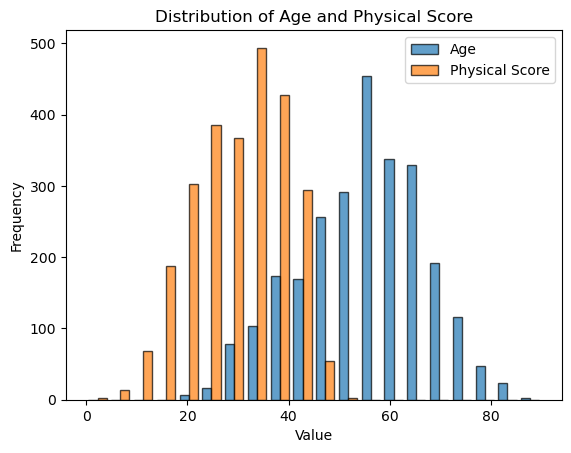

In [331]:

plt.hist([data["age"], data["physical_score"]], bins=20, edgecolor="black", label=["Age", "Physical Score"], alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Age and Physical Score")
plt.legend()
plt.show()



### The histogram illustrates the distribution of age and physical score, revealing that age follows a broader spread with a peak around 40-60, while physical score is more concentrated at lower values, peaking around 20-30, with noticeable overlap, suggesting a potential relationship between the two variables.









In [334]:
data2 =data[["age","physical_score"]]

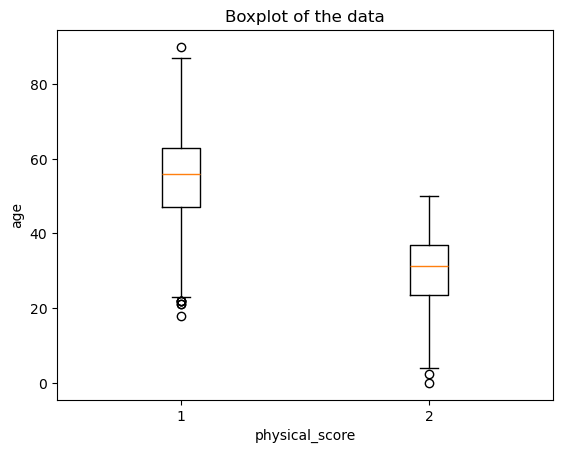

In [336]:
plt.boxplot(data2)
# Add title and labels
plt.title("Boxplot of the data")
plt.xlabel("physical_score")
plt.ylabel("age")

# Show the plot
plt.show()

### The boxplot above shows the age distribution across two physical_score categories (1 and 2). The X-axis represents physical_score, while the Y-axis represents age (0–90). Each box captures the IQR (25th–75th percentile), with the median (orange line) inside. Whiskers extend to non-outlier min/max values, and outliers (small circles) indicate extreme values. For physical_score 1, the median age is approximately 50, with a wider age range (20–80) and several outliers. For physical_score 2, the median age is approximately 30, with a more compact distribution and a few outliers below 20.

### I handled feature sclaing("age") by making sure it is discrete number as supposed to contionus number that was it former state, this data does not require any form of normalisation, standardization, or dimentionality reduction as all the features are nessecary for solving the classification problem, same thing for feature selection and the data already came in an encoded format. 

## Potential Limitation Of The Data

### The major limitation of the data is that it was simulated( a synthetic dataset), and had too many duplicate data about 1400. it will be good to try these classification model on a real world dataset.

# Machine  Learning Model Building

### I am going to be building the following ML models(algorithms)
1) Naive Bayes
2) linear Discriminant Analysis
3) Ridge Classifier
4) Voting Classifier
5) Bagging Classifier

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score


# Load and prepare the data

In [347]:
X = data[["age", "physical_score"]]  # Feature selection
y = data["test_result"]  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (not needed for Naive Bayes but useful for other models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Training the individual models

### Naive Bayes

In [351]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.8442307692307692


### Linear Discriminant Analysis (LDA)

In [354]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, lda_pred))

LDA Accuracy: 0.8423076923076923


### Ridge Classifier


In [357]:
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
print("Ridge Classifier Accuracy:", accuracy_score(y_test, ridge_pred))


Ridge Classifier Accuracy: 0.8423076923076923


### Voting Classifier (Combining Multiple Models)

In [360]:
voting_model = VotingClassifier(estimators=[
    ('Naive Bayes', nb_model),
    ('LDA', lda_model),
    ('Ridge', ridge_model)
], voting='hard')

voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_pred))


Voting Classifier Accuracy: 0.8423076923076923


### Bagging Classifier (Using Ridge Classifier as Base Estimator)


### After training the model, i proceeded to deploy the models using Flask and FastAPI

In [1]:
pip install flask


In [3]:
pip install fastapi

Note: you may need to restart the kernel to use updated packages.


In [7]:
from flask import Flask


In [9]:
pip install seaborn
